# Covid-19 Prediction 
## Name: Brandon Hanlon

In [91]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [92]:
#Read the data from the file
data = pd.read_csv('./data/05-09-2020.csv')

In [93]:
data

,Dates,New Cases Per Day,Deaths Per Day,Recovered Per Day,Total Cases,Total Deaths,Total Recovered,Active Cases
0,01-22-2020,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,01-23-2020,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,01-24-2020,0.0,0.0,0.0,2.0,0.0,0.0,2.0
3,01-25-2020,3.0,0.0,0.0,2.0,0.0,0.0,2.0
4,01-26-2020,0.0,0.0,0.0,5.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...
103,05-04-2020,23976.0,2142.0,2611.0,1180375.0,68922.0,187180.0,924273.0
104,05-05-2020,24252.0,2367.0,119.0,1204351.0,71064.0,189791.0,943496.0
105,05-06-2020,28420.0,2231.0,5126.0,1228603.0,73431.0,189910.0,965262.0
106,05-07-2020,26906.0,1518.0,3957.0,1257023.0,75662.0,195036.0,986325.0


# Data Visualization

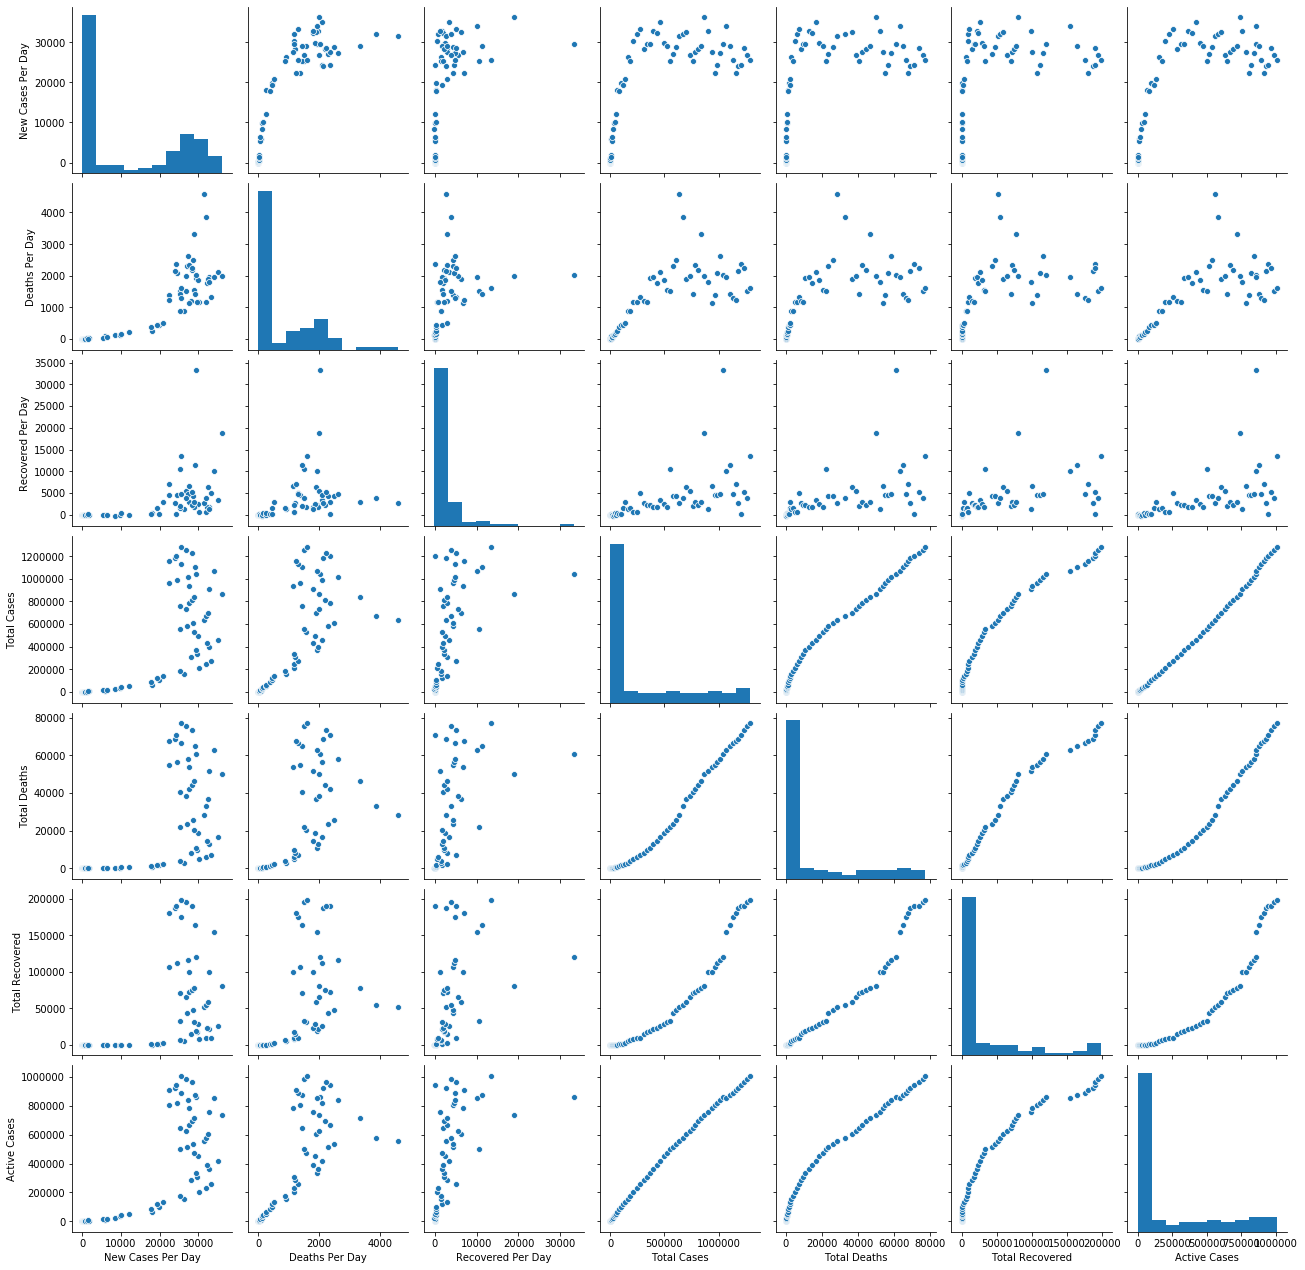

In [94]:
sns.pairplot(data)

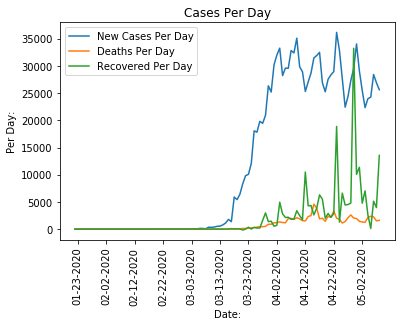

In [95]:
x = data['Dates']
fig, ax = plt.subplots()

ax.plot(x, data['New Cases Per Day'])
ax.plot(x, data['Deaths Per Day'])
ax.plot(x, data['Recovered Per Day'])
plt.xticks(x[1::10], rotation=90)
plt.legend(['New Cases Per Day', 'Deaths Per Day', 'Recovered Per Day'])
ax.set_title('Cases Per Day')
ax.set_xlabel('Date:')
ax.set_ylabel('Per Day:')
plt.show()

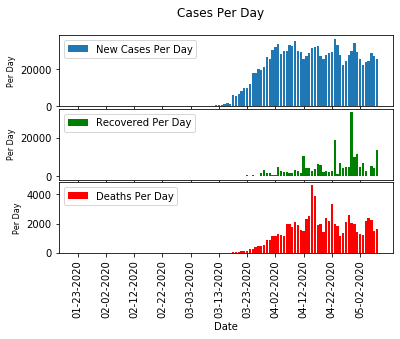

In [96]:
type1 = ['New Cases Per Day']
type2 = ['Recovered Per Day']
type3 = ['Deaths Per Day']

fig = plt.figure()
gs = gridspec.GridSpec(15, 2)
gs.update(wspace=.3)

ax1 = fig.add_subplot(gs[0:5, :])
ax1.bar(x, data['New Cases Per Day'])
plt.xticks(x[1::10], rotation=90)
ax1.tick_params(labelbottom=False)  
ax1.set_ylabel('Per Day', fontsize=8)
plt.legend(type1)

ax2 = fig.add_subplot(gs[5:10,:])
ax2.bar(x, data['Recovered Per Day'], color='green')
plt.xticks(x[1::10], rotation=90)
ax2.tick_params(labelbottom=False) 
ax2.set_ylabel('Per Day', fontsize=8)
plt.legend(type2)

ax3 = fig.add_subplot(gs[10:,:])
ax3.bar(x, data['Deaths Per Day'], color='red')
plt.xticks(x[1::10], rotation=90)
ax3.set_ylabel('Per Day', fontsize=8)
ax3.set_xlabel('Date')
plt.legend(type3)

fig.suptitle('Cases Per Day')

plt.show()


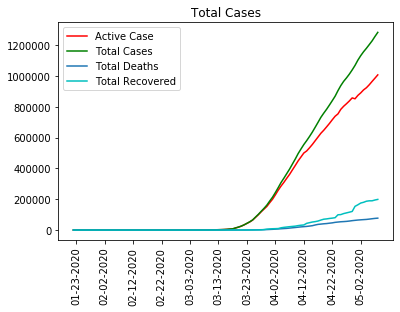

In [97]:

plt.plot(data['Dates'], data['Active Cases'], color='red')
plt.plot(data['Dates'], data['Total Cases'], color='g')
plt.plot(data['Dates'], data['Total Deaths'])
plt.plot(data['Dates'], data['Total Recovered'], color='c')
plt.title('Total Cases')
plt.xticks(x[1::10], rotation=90)
plt.legend(['Active Case', 'Total Cases', 'Total Deaths', 'Total Recovered'])
plt.show()

# Regression Without Totals
## Linear Regression

In [98]:
X = data[['New Cases Per Day', 'Deaths Per Day', 'Recovered Per Day']]
y = data[['Active Cases']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [99]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train)
reg.score(X_test,y_test)

0.78684461728482

## Ridge Regression

In [100]:
from sklearn.linear_model import Ridge

param_grid = {'alpha': np.logspace(-3, 0, 10)}

grid_ridge = GridSearchCV(Ridge(), param_grid, cv=10, return_train_score=True)
grid_ridge.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([0.001     , 0.00215443, 0.00464159, 0.01      , 0.02154435,
       0.04641589, 0.1       , 0.21544347, 0.46415888, 1.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [101]:
print(grid_ridge.best_params_)
print(grid_ridge.best_score_)
print(grid_ridge.score(X_test, y_test))

{'alpha': 1.0}
0.5427885971079384
0.786844616814736


## Lasso Regression

In [102]:
from sklearn.linear_model import Lasso

lasso = GridSearchCV(Lasso(), param_grid, cv=10, return_train_score=True)
lasso.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([0.001     , 0.00215443, 0.00464159, 0.01      , 0.02154435,
       0.04641589, 0.1       , 0.21544347, 0.46415888, 1.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [103]:
print(lasso.best_params_)
print(lasso.best_score_)
print(lasso.score(X_test, y_test))

{'alpha': 1.0}
0.5427885858126607
0.7868446169601914


# Regression with totals
## Linear Regression

In [104]:
X = data[['New Cases Per Day', 'Deaths Per Day', 'Recovered Per Day', 'Total Cases', 'Total Deaths', 'Total Recovered']]
y = data[['Active Cases']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [105]:
reg = LinearRegression()
reg.fit(X_train,y_train)
reg.score(X_test,y_test)

1.0

## Ridge Regression

In [106]:
param_grid = {'alpha': np.logspace(-3, 0, 10)}

grid_ridge = GridSearchCV(Ridge(), param_grid, cv=10, return_train_score=True)
grid_ridge.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([0.001     , 0.00215443, 0.00464159, 0.01      , 0.02154435,
       0.04641589, 0.1       , 0.21544347, 0.46415888, 1.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [107]:
print(grid_ridge.best_params_)
print(grid_ridge.best_score_)
print(grid_ridge.score(X_test, y_test))

{'alpha': 0.001}
1.0
1.0


## Lasso Regression

In [108]:
lasso = GridSearchCV(Lasso(), param_grid, cv=10, return_train_score=True)
lasso.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([0.001     , 0.00215443, 0.00464159, 0.01      , 0.02154435,
       0.04641589, 0.1       , 0.21544347, 0.46415888, 1.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [109]:
print(lasso.best_params_)
print(lasso.best_score_)
print(lasso.score(X_test, y_test))

{'alpha': 1.0}
0.9999930415209217
0.9999922128099124
